In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('anomaly-free.csv',sep=';')
df = df[::15]

In [5]:
df['datetime']=pd.to_datetime(df['datetime'])

In [6]:
df=df.set_index('datetime')

In [28]:
df[['Accelerometer1RMS']]

,Accelerometer1RMS
datetime,
2020-02-08 13:30:47,0.206030
2020-02-08 13:31:03,0.204992
2020-02-08 13:31:19,0.204205
2020-02-08 13:31:35,0.203509
2020-02-08 13:31:51,0.208436
...,...
2020-02-08 16:15:34,0.215301
2020-02-08 16:15:50,0.215122
2020-02-08 16:16:05,0.215913


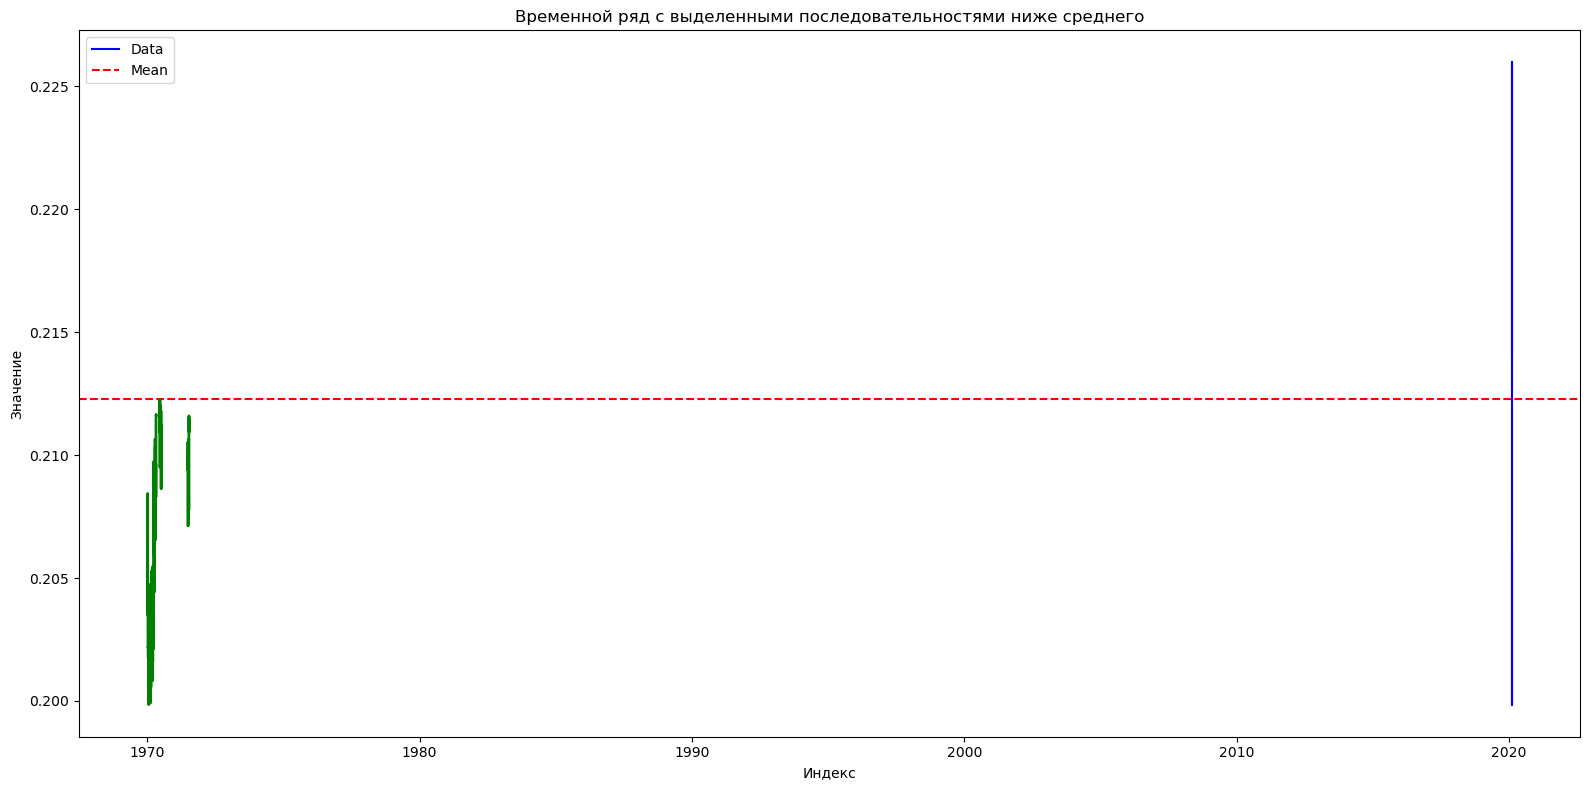

In [33]:


mean_value = df['Accelerometer1RMS'].mean()
below_mean_segments = []
count = 0
start_idx = None

for i in range(len(df)):
    if df['Accelerometer1RMS'].iloc[i] < mean_value:
        if count == 0:
            start_idx = i
        count += 1
        if count >= 14 and (i == len(df) - 1 or df['Accelerometer1RMS'].iloc[i + 1] >= mean_value):
            below_mean_segments.append((start_idx, i))
    else:
        count = 0

plt.figure(figsize=(16, 8))
plt.plot(df['Accelerometer1RMS'], label='Data', color='blue')
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')

for start, end in below_mean_segments:
    plt.plot(range(start, end + 1), df['Accelerometer1RMS'].iloc[start:end + 1], color='green', linewidth=2)

plt.title('Временной ряд с выделенными последовательностями ниже среднего')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.tight_layout()
plt.show()

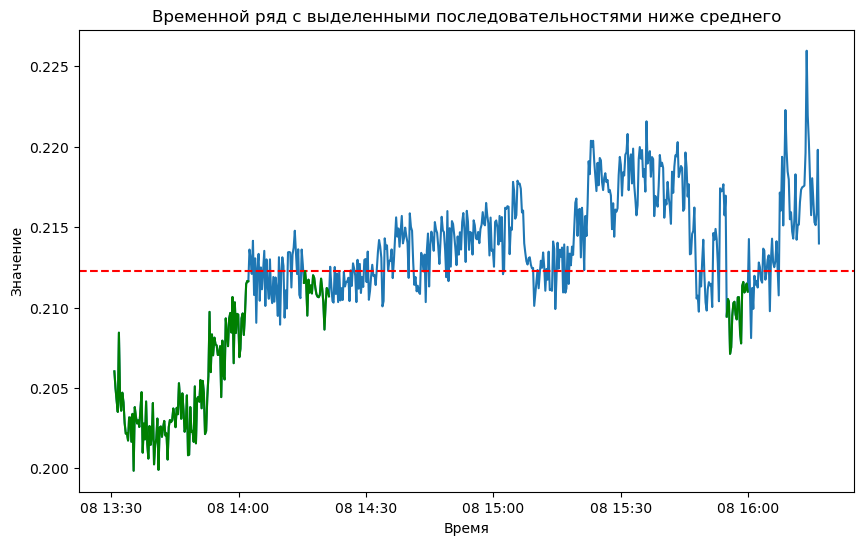

In [39]:


mean_value = df['Accelerometer1RMS'].mean()
below_mean_segments = []
count = 0
start_idx = None

for i in range(len(df)):
    if df['Accelerometer1RMS'].iloc[i] < mean_value:
        if count == 0:
            start_idx = i
        count += 1
        if count >= 14 and (i == len(df) - 1 or df['Accelerometer1RMS'].iloc[i + 1] >= mean_value):
            below_mean_segments.append((start_idx, i))
    else:
        count = 0

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Accelerometer1RMS'], label='Data')
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')

for start, end in below_mean_segments:
    plt.plot(df.index[start:end + 1], df['Accelerometer1RMS'].iloc[start:end + 1], color='green')

plt.title('Временной ряд с выделенными последовательностями ниже среднего')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()

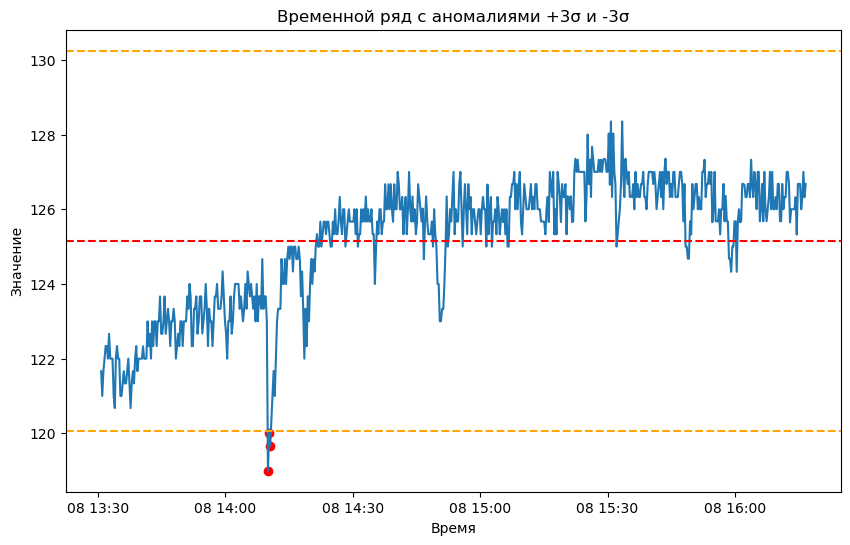

In [88]:

mean_value = df['Volume Flow RateRMS'].mean()
std_dev = df['Volume Flow RateRMS'].std()

lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev

anomalies = df[(df['Volume Flow RateRMS'] < lower_bound) | (df['Volume Flow RateRMS'] > upper_bound)]

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume Flow RateRMS'], label='Data')
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(y=lower_bound, color='orange', linestyle='--', label='Lower Bound (Mean - 3σ)')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound (Mean + 3σ)')
plt.scatter(anomalies.index, anomalies['Volume Flow RateRMS'], color='red', label='Anomalies')

plt.title('Временной ряд с аномалиями +3σ и -3σ')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()

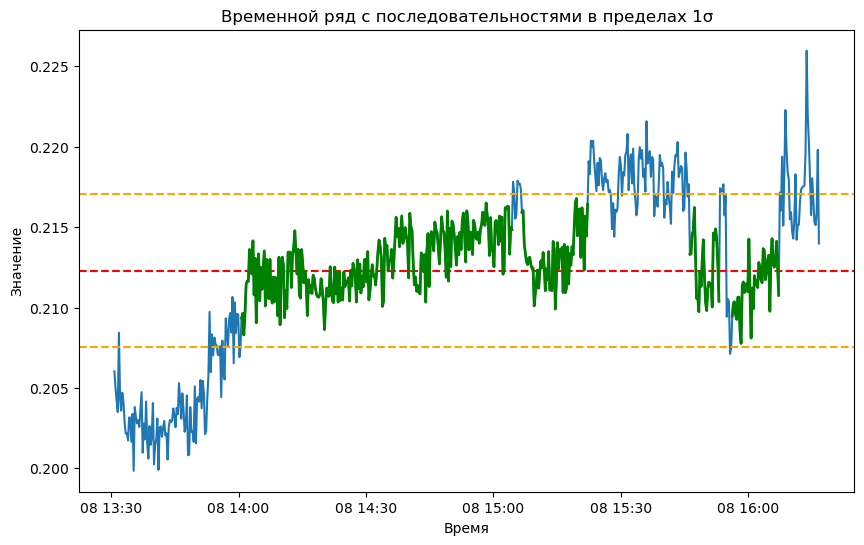

In [42]:
mean_value = df['Volume Flow RateRMS'].mean()
std_dev = df['Volume Flow RateRMS'].std()

lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev

anomalies = df[(df['Volume Flow RateRMS'] < lower_bound) | (df['Volume Flow RateRMS'] > upper_bound)]

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume Flow RateRMS'], label='Data')
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(y=lower_bound, color='orange', linestyle='--', label='Lower Bound (Mean - 3σ)')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound (Mean + 3σ)')
plt.scatter(anomalies.index, anomalies['Volume Flow RateRMS'], color='red', label='Anomalies')

plt.title('Временной ряд с аномалиями +3σ и -3σ')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()

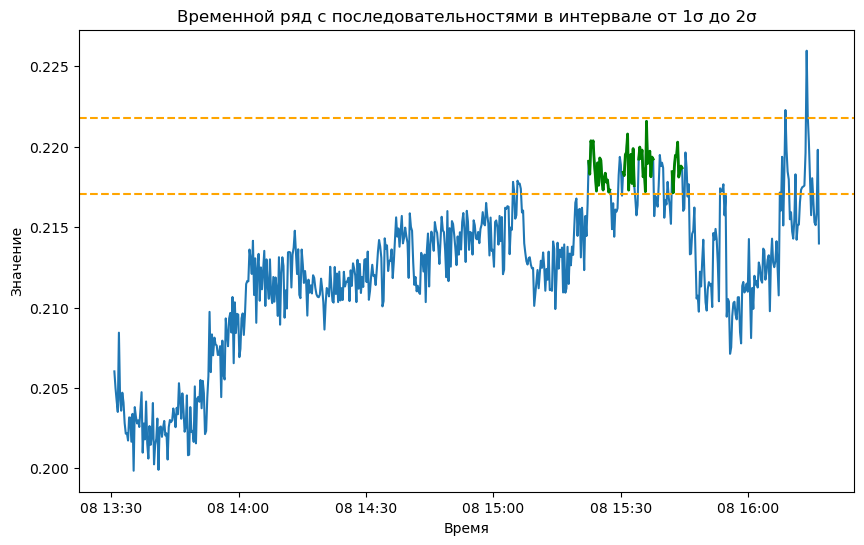

In [44]:
mean_value = df['Accelerometer1RMS'].mean()
std_dev = df['Accelerometer1RMS'].std()

lower_bound = mean_value + std_dev
upper_bound = mean_value + 2 * std_dev

segments = []
count = 0
start_idx = None

for i in range(len(df)):
    if lower_bound <= df['Accelerometer1RMS'].iloc[i] <= upper_bound:
        if count == 0:
            start_idx = i
        count += 1
        if count >= 7 and (i == len(df) - 1 or not (lower_bound <= df['Accelerometer1RMS'].iloc[i + 1] <= upper_bound)):
            segments.append((start_idx, i))
    else:
        count = 0

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Accelerometer1RMS'], label='Data')
plt.axhline(y=lower_bound, color='orange', linestyle='--', label='1σ Boundary')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='2σ Boundary')

for start, end in segments:
    plt.plot(df.index[start:end + 1], df['Accelerometer1RMS'].iloc[start:end + 1], color='green', linewidth=2)

plt.title('Временной ряд с последовательностями в интервале от 1σ до 2σ')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()

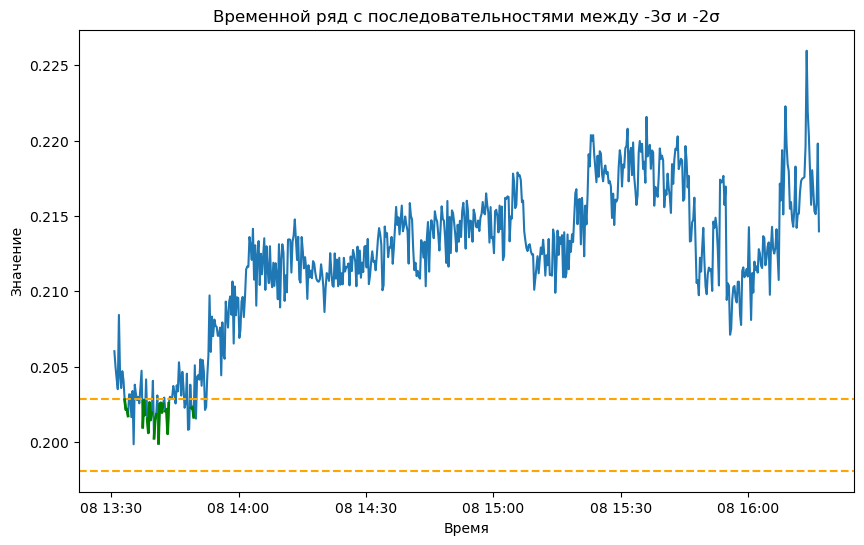

In [46]:
mean_value = df['Accelerometer1RMS'].mean()
std_dev = df['Accelerometer1RMS'].std()

lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value - 2 * std_dev

segments = []
count = 0
start_idx = None

for i in range(len(df)):
    if lower_bound <= df['Accelerometer1RMS'].iloc[i] <= upper_bound:
        if count == 0:
            start_idx = i
        count += 1
        if count >= 3 and (i == len(df) - 1 or not (lower_bound <= df['Accelerometer1RMS'].iloc[i + 1] <= upper_bound)):
            segments.append((start_idx, i))
    else:
        count = 0

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Accelerometer1RMS'], label='Data')
plt.axhline(y=lower_bound, color='orange', linestyle='--', label='-3σ Boundary')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='-2σ Boundary')

for start, end in segments:
    plt.plot(df.index[start:end + 1], df['Accelerometer1RMS'].iloc[start:end + 1], color='green', linewidth=2)

plt.title('Временной ряд с последовательностями между -3σ и -2σ')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()

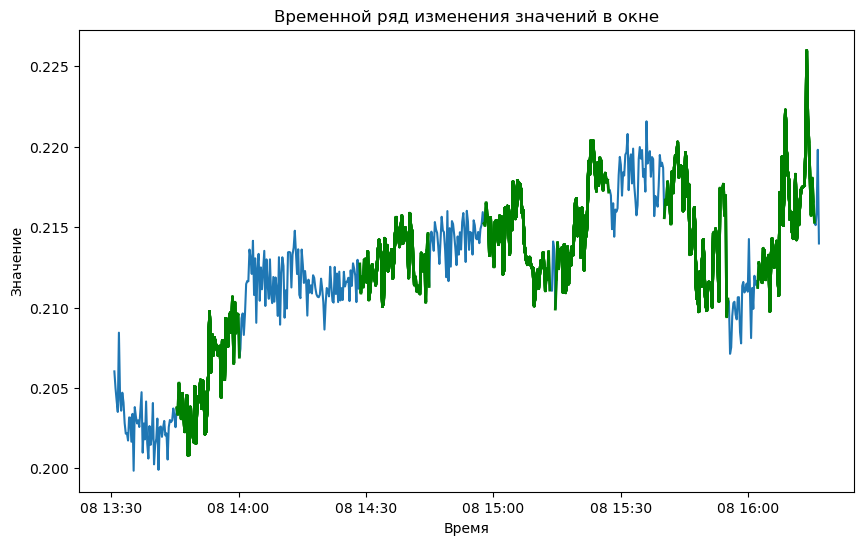

In [14]:
window_size = 30
highlight_indices = []

for i in range(window_size, len(df) - window_size):
    var_before = np.var(df['Accelerometer1RMS'].iloc[i-window_size:i])
    var_after = np.var(df['Accelerometer1RMS'].iloc[i:i + window_size])
    
    if var_after < var_before * 0.15 or var_after > var_before * 1.85:
        highlight_indices.append(i)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Accelerometer1RMS'], label='Accelerometer1RMS')

for idx in highlight_indices:
    plt.plot(df.index[idx:idx + window_size], df['Accelerometer1RMS'].iloc[idx:idx + window_size], color='green', lw=2)

plt.title('Временной ряд изменения значений в окне')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()